In [ ]:
import pandas as pd

file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

In [6]:
# Rename columns for clarity
df.columns = [f"Emotion_{i}" if "Unnamed" in str(col) else col for i, col in enumerate(df.columns)]



In [7]:
# Drop irrelevant columns (all NaN columns)
df_cleaned = df.dropna(axis=1, how='all')



In [8]:
# Drop rows with missing Brand or Score
df_cleaned = df_cleaned.dropna(subset=['Brand', 'Score'])



KeyError: ['Score']

In [9]:
import pandas as pd

# Load the dataset
file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

# Display column names
print(df.columns)

Index(['Index', 'a follower', 'a gossip', 'a show-off', 'absentminded',
       'authoritarian', 'childish', 'complicated', 'conformist', 'crazy',
       ...
       'unmotivated', 'unpleasant', 'unpopular', 'unreasonable', 'unreliable',
       'unsophisticated', 'uptight', 'defiant', 'Brand', 'Consideration'],
      dtype='object', length=180)


In [10]:
# Rename columns for better readability
df.columns = [f"Emotion_{i}" if "Unnamed" in str(col) else col for i, col in enumerate(df.columns)]

# Display updated column names
print(df.columns)

Index(['Index', 'a follower', 'a gossip', 'a show-off', 'absentminded',
       'authoritarian', 'childish', 'complicated', 'conformist', 'crazy',
       ...
       'unmotivated', 'unpleasant', 'unpopular', 'unreasonable', 'unreliable',
       'unsophisticated', 'uptight', 'defiant', 'Brand', 'Consideration'],
      dtype='object', length=180)


In [11]:
# Drop irrelevant columns (all NaN columns)
df_cleaned = df.dropna(axis=1, how='all')

# Drop rows with missing Brand or Consideration
df_cleaned = df_cleaned.dropna(subset=['Brand', 'Consideration'])

# Convert 'Consideration' to numeric, coercing errors to NaN
df_cleaned['Consideration'] = pd.to_numeric(df_cleaned['Consideration'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Consideration'])

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Save cleaned data
output_file = "Cleaned_Database_test_ds.xlsx"
df_cleaned.to_excel(output_file, index=False)

print(f"Cleaned data saved to {output_file}")

Cleaned data saved to Cleaned_Database_test_ds.xlsx


In [12]:
# Identify emotion columns
emotion_columns = [col for col in df_cleaned.columns if "Emotion_" in col]

# Drop rows where all emotion variables are NaN
df_cleaned = df_cleaned.dropna(subset=emotion_columns, how='all')

# Display the cleaned DataFrame
print(df_cleaned.head())

Empty DataFrame
Columns: [Index, a follower, a gossip, a show-off, absentminded, authoritarian, childish, complicated, conformist, crazy, cunning, demanding, introverted, long-winded, naughty, out-of-date, outspoken, rebellious, wealthy, scatter-brained, streetwise, theatrical, timid, uneducated, unfashionable, unimaginative, untidy, wasteful, weak, a goody-goody, a joker, a leader, a pushover, active, ambitious, arty, attractive, average, balanced, brave, calm, careful, careful-with-money, competent, confident, conservative, cool, creative, cute, decent, dependent, determined, different, diplomatic, discerning, down-to-earth, easy-going, emotional, entrepreneurial, extroverted, family-oriented, fashionable, friendly, good, gullible, happy, hard-working, honest, hot, indoorsy, influential, inspiring, intelligent, interesting, kind, knowledgeable, lax, liberal, like you, likeable, loving, loyal, mature, modern, naïve, nurturing, obedient, old-fashioned, open-minded, optimistic, outdoors

In [13]:
# Check for missing values
print(df_cleaned.isnull().sum())

# Get information about the dataset
print(df_cleaned.info())

Index              0
a follower         0
a gossip           0
a show-off         0
absentminded       0
                  ..
unsophisticated    0
uptight            0
defiant            0
Brand              0
Consideration      0
Length: 180, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 180 entries, Index to Consideration
dtypes: float64(178), int64(1), object(1)
memory usage: 0.0+ bytes
None


In [14]:
# Identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Drop rows where all emotion variables are NaN
df_cleaned = df.dropna(subset=emotion_columns, how='all')

In [15]:
# Drop rows with missing Brand or Consideration
df_cleaned = df_cleaned.dropna(subset=['Brand', 'Consideration'])

In [16]:
# Count rows before and after cleaning
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after cleaning: {len(df_cleaned)}")

# Identify removed rows
removed_rows = df.index.difference(df_cleaned.index)
print(f"Rows removed during cleaning: {removed_rows}")

Original number of rows: 1554
Number of rows after cleaning: 0
Rows removed during cleaning: RangeIndex(start=0, stop=1554, step=1)


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

# Rename columns for clarity
df.columns = [f"Emotion_{i}" if "Unnamed" in str(col) else col for i, col in enumerate(df.columns)]

# Identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Select emotion data
emotion_data = df[emotion_columns]

# Debugging: Check emotion_data
print("Emotion columns:", emotion_columns)
print("First few rows of emotion_data:")
print(emotion_data.head())
print("Missing values in emotion_data:")
print(emotion_data.isnull().sum())
print("Data types in emotion_data:")
print(emotion_data.dtypes)

# Clean emotion_data
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN

# Recompute correlation matrix
correlation_matrix = emotion_data.corr()

# Debugging: Check correlation_matrix
print("Correlation matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Emotions")
plt.show()

Emotion columns: []
First few rows of emotion_data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Missing values in emotion_data:
Series([], dtype: float64)
Data types in emotion_data:
Series([], dtype: object)
Correlation matrix:
Empty DataFrame
Columns: []
Index: []


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

# Rename columns for clarity
df.columns = [f"Emotion_{i}" if "Unnamed" in str(col) else col for i, col in enumerate(df.columns)]

# Identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Select emotion data
emotion_data = df[emotion_columns]

# Debugging: Check emotion_data
print("Emotion columns:", emotion_columns)
print("First few rows of emotion_data:")
print(emotion_data.head())
print("Missing values in emotion_data:")
print(emotion_data.isnull().sum())
print("Data types in emotion_data:")
print(emotion_data.dtypes)

# Clean emotion_data
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN

# Recompute correlation matrix
correlation_matrix = emotion_data.corr()

# Debugging: Check correlation_matrix
print("Correlation matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Emotions")
plt.show()

Emotion columns: []
First few rows of emotion_data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Missing values in emotion_data:
Series([], dtype: float64)
Data types in emotion_data:
Series([], dtype: object)
Correlation matrix:
Empty DataFrame
Columns: []
Index: []


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [23]:
# Aggregate emotions by brand
emotion_columns = [col for col in df_cleaned.columns if "Emotion_" in col]
brand_emotion_summary = df_cleaned.groupby("Brand")[emotion_columns].mean()

# Display top emotions for each brand
top_emotions_per_brand = brand_emotion_summary.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)
print(top_emotions_per_brand)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Relative Strength of Emotions by Brand")
plt.show()

Series([], dtype: float64)


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [24]:
emotion_data = df_cleaned[emotion_columns].dropna(axis=1, how='all')

In [25]:
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')

In [26]:
emotion_data = emotion_data.dropna(axis=0, how='all')

In [27]:
# Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df_cleaned["Brand"]).mean()

# Display the aggregated data
print(brand_emotion_summary)

Empty DataFrame
Columns: []
Index: []


In [28]:
# Check if brand_emotion_summary is empty
if brand_emotion_summary.empty:
    print("No valid data to plot. Please check the input data.")
else:
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=True, fmt=".2f")
    plt.title("Relative Strength of Emotions by Brand")
    plt.show()

No valid data to plot. Please check the input data.


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

# Rename columns for clarity
df.columns = [f"Emotion_{i}" if "Unnamed" in str(col) else col for i, col in enumerate(df.columns)]

# Identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Select emotion data
emotion_data = df[emotion_columns]

# Debugging: Check emotion_data
print("Emotion columns:", emotion_columns)
print("First few rows of emotion_data:")
print(emotion_data.head())
print("Missing values in emotion_data:")
print(emotion_data.isnull().sum())
print("Data types in emotion_data:")
print(emotion_data.dtypes)

# Clean emotion_data
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN

# Debugging: Check cleaned emotion_data
print("Cleaned emotion_data:")
print(emotion_data.head())

# Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Debugging: Check brand_emotion_summary
print("Brand emotion summary:")
print(brand_emotion_summary)

# Plot heatmap if data is valid
if brand_emotion_summary.empty:
    print("No valid data to plot. Please check the input data.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=True, fmt=".2f")
    plt.title("Relative Strength of Emotions by Brand")
    plt.show()

Emotion columns: []
First few rows of emotion_data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Missing values in emotion_data:
Series([], dtype: float64)
Data types in emotion_data:
Series([], dtype: object)
Cleaned emotion_data:
Empty DataFrame
Columns: []
Index: []
Brand emotion summary:
Empty DataFrame
Columns: []
Index: []
No valid data to plot. Please check the input data.


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

# Rename columns for clarity
df.columns = [f"Emotion_{i}" if "Unnamed" in str(col) else col for i, col in enumerate(df.columns)]

# Identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Select emotion data
emotion_data = df[emotion_columns]

# Debugging: Check emotion_data
print("Emotion columns:", emotion_columns)
print("First few rows of emotion_data:")
print(emotion_data.head())
print("Missing values in emotion_data:")
print(emotion_data.isnull().sum())
print("Data types in emotion_data:")
print(emotion_data.dtypes)

# Clean emotion_data
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN

# Debugging: Check cleaned emotion_data
print("Cleaned emotion_data:")
print(emotion_data.head())

# Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Debugging: Check brand_emotion_summary
print("Brand emotion summary:")
print(brand_emotion_summary)

# Plot heatmap if data is valid
if brand_emotion_summary.empty:
    print("No valid data to plot. Please check the input data.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=True, fmt=".2f")
    plt.title("Relative Strength of Emotions by Brand")
    plt.show()

Emotion columns: []
First few rows of emotion_data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Missing values in emotion_data:
Series([], dtype: float64)
Data types in emotion_data:
Series([], dtype: object)
Cleaned emotion_data:
Empty DataFrame
Columns: []
Index: []
Brand emotion summary:
Empty DataFrame
Columns: []
Index: []
No valid data to plot. Please check the input data.


In [31]:
# Print raw column names
print("Raw column names:")
print(df.columns)

Raw column names:
Index(['Index', 'a follower', 'a gossip', 'a show-off', 'absentminded',
       'authoritarian', 'childish', 'complicated', 'conformist', 'crazy',
       ...
       'unmotivated', 'unpleasant', 'unpopular', 'unreasonable', 'unreliable',
       'unsophisticated', 'uptight', 'defiant', 'Brand', 'Consideration'],
      dtype='object', length=180)


In [32]:
# Identify emotion columns by position
non_emotion_columns = ["Brand", "Consideration"]  # Add other non-emotion columns if needed
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Display emotion columns
print("Emotion columns:")
print(emotion_columns)

Emotion columns:
['Index', 'a follower', 'a gossip', 'a show-off', 'absentminded', 'authoritarian', 'childish', 'complicated', 'conformist', 'crazy', 'cunning', 'demanding', 'introverted', 'long-winded', 'naughty', 'out-of-date', 'outspoken', 'rebellious', 'wealthy', 'scatter-brained', 'streetwise', 'theatrical', 'timid', 'uneducated', 'unfashionable', 'unimaginative', 'untidy', 'wasteful', 'weak', 'a goody-goody', 'a joker', 'a leader', 'a pushover', 'active', 'ambitious', 'arty', 'attractive', 'average', 'balanced', 'brave', 'calm', 'careful', 'careful-with-money', 'competent', 'confident', 'conservative', 'cool', 'creative', 'cute', 'decent', 'dependent', 'determined', 'different', 'diplomatic', 'discerning', 'down-to-earth', 'easy-going', 'emotional', 'entrepreneurial', 'extroverted', 'family-oriented', 'fashionable', 'friendly', 'good', 'gullible', 'happy', 'hard-working', 'honest', 'hot', 'indoorsy', 'influential', 'inspiring', 'intelligent', 'interesting', 'kind', 'knowledgeable

In [33]:
# Rename emotion columns
df.columns = non_emotion_columns + [f"Emotion_{i}" for i in range(len(emotion_columns))]

# Re-identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Display updated column names
print("Updated column names:")
print(df.columns)

Updated column names:
Index(['Brand', 'Consideration', 'Emotion_0', 'Emotion_1', 'Emotion_2',
       'Emotion_3', 'Emotion_4', 'Emotion_5', 'Emotion_6', 'Emotion_7',
       ...
       'Emotion_168', 'Emotion_169', 'Emotion_170', 'Emotion_171',
       'Emotion_172', 'Emotion_173', 'Emotion_174', 'Emotion_175',
       'Emotion_176', 'Emotion_177'],
      dtype='object', length=180)


In [34]:
# Select emotion data
emotion_data = df[emotion_columns]

# Convert columns to numeric
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')

# Drop rows where all emotion variables are NaN
emotion_data = emotion_data.dropna(axis=0, how='all')

# Display cleaned emotion data
print("Cleaned emotion_data:")
print(emotion_data.head())

Cleaned emotion_data:
   Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Emotion_6  Emotion_7  Emotion_8  Emotion_9  ...  Emotion_168  Emotion_169  \
0        0.0        0.0        0.0        0.0  ...          0.0          0.0   
1        0.0        0.0        0.0        0.0  ...          0.0          0.0   
2        0.0        0.0        0.0        0.0  ...          0.0          0.0   
3        NaN        NaN        NaN        NaN  ...          NaN          NaN   
4        0.0        0.0        0.0        0.0  ...          0.0          0.0   

   Emotion_170  Emotion_171  Emotion_172  Emotion_173  Emotion_174  \


In [35]:
# Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Display the aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

Brand emotion summary:
       Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
Brand                                                                     
0            0.0        0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0        0.0   
3            NaN        NaN        NaN        NaN        NaN        NaN   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
1549         NaN        NaN        NaN        NaN        NaN        NaN   
1550         NaN        NaN        NaN        NaN        NaN        NaN   
1551         NaN        NaN        NaN        NaN        NaN        NaN   
1552         NaN        NaN        NaN        NaN        NaN        NaN   
1553         NaN        NaN        NaN        NaN        NaN        NaN   

 

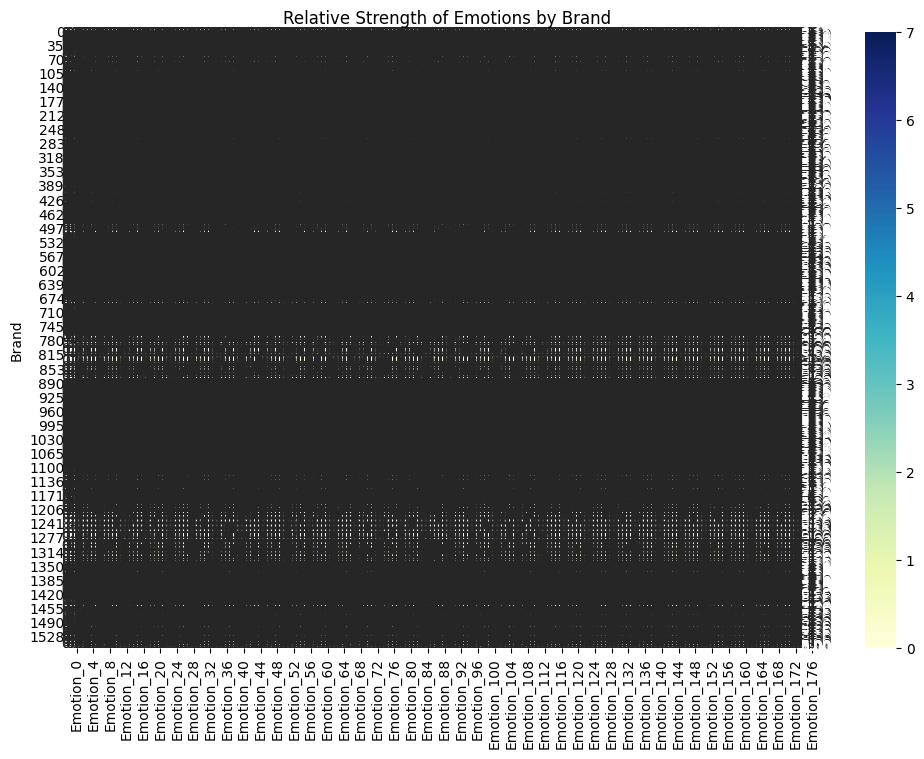

In [36]:
# Check if brand_emotion_summary is empty
if brand_emotion_summary.empty:
    print("No valid data to plot. Please check the input data.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=True, fmt=".2f")
    plt.title("Relative Strength of Emotions by Brand")
    plt.show()

Raw column names:
Index(['Index', 'a follower', 'a gossip', 'a show-off', 'absentminded',
       'authoritarian', 'childish', 'complicated', 'conformist', 'crazy',
       ...
       'unmotivated', 'unpleasant', 'unpopular', 'unreasonable', 'unreliable',
       'unsophisticated', 'uptight', 'defiant', 'Brand', 'Consideration'],
      dtype='object', length=180)
Updated column names:
Index(['Brand', 'Consideration', 'Emotion_0', 'Emotion_1', 'Emotion_2',
       'Emotion_3', 'Emotion_4', 'Emotion_5', 'Emotion_6', 'Emotion_7',
       ...
       'Emotion_168', 'Emotion_169', 'Emotion_170', 'Emotion_171',
       'Emotion_172', 'Emotion_173', 'Emotion_174', 'Emotion_175',
       'Emotion_176', 'Emotion_177'],
      dtype='object', length=180)
Cleaned emotion_data:
   Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0       

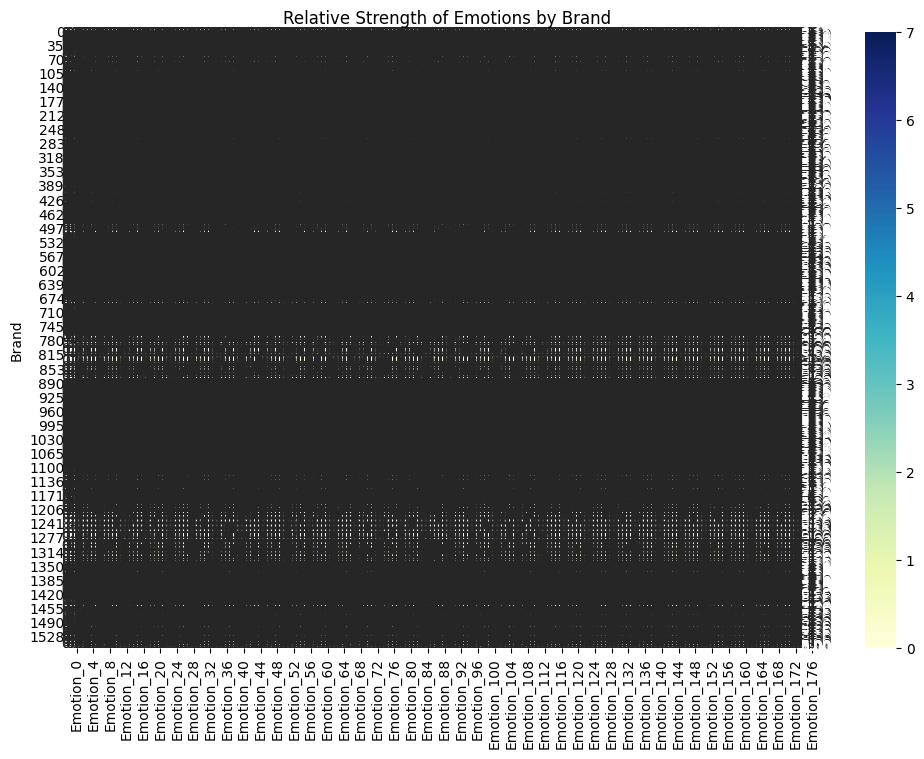

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

# Step 1: Inspect raw column names
print("Raw column names:")
print(df.columns)

# Step 2: Identify emotion columns
non_emotion_columns = ["Brand", "Consideration"]  # Add other non-emotion columns if needed
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Step 3: Rename emotion columns
df.columns = non_emotion_columns + [f"Emotion_{i}" for i in range(len(emotion_columns))]
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Display updated column names
print("Updated column names:")
print(df.columns)

# Step 4: Clean emotion data
emotion_data = df[emotion_columns]
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN

# Display cleaned emotion data
print("Cleaned emotion_data:")
print(emotion_data.head())

# Step 5: Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Display the aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

# Step 6: Plot heatmap if data is valid
if brand_emotion_summary.empty:
    print("No valid data to plot. Please check the input data.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=True, fmt=".2f")
    plt.title("Relative Strength of Emotions by Brand")
    plt.show()

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset (assuming it's already cleaned)
file_path = "Cleaned_Database_test_ds.xlsx"
df_cleaned = pd.read_excel(file_path)

# Identify emotion columns
emotion_columns = [col for col in df_cleaned.columns if "Emotion_" in col]

# Aggregate emotions by brand
brand_emotion_summary = df_cleaned.groupby("Brand")[emotion_columns].mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=False)
plt.title("Relative Strength of Emotions by Brand")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

IndexError: index 0 is out of bounds for axis 0 with size 0

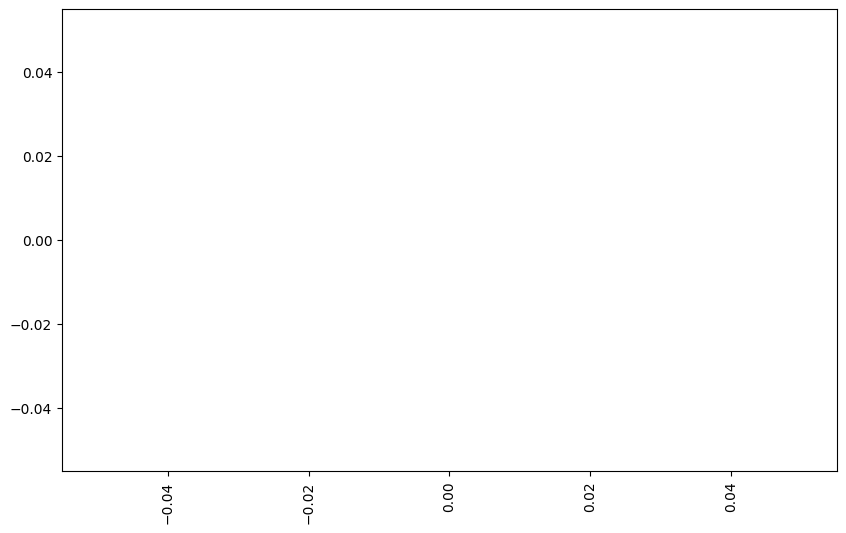

In [39]:
# Calculate variance of emotions across brands
emotion_variance = brand_emotion_summary.var(axis=0)

# Sort emotions by variance
emotion_variance_sorted = emotion_variance.sort_values(ascending=False)

# Plot bar chart of top differentiating emotions
plt.figure(figsize=(10, 6))
emotion_variance_sorted.head(10).plot(kind="bar", color="skyblue")
plt.title("Top Differentiating Emotions Across Brands")
plt.ylabel("Variance")
plt.show()

In [40]:
# Display emotion_data
print("Emotion data:")
print(emotion_data.head())

# Check for missing values
print("Missing values in emotion_data:")
print(emotion_data.isnull().sum())

# Check data types
print("Data types in emotion_data:")
print(emotion_data.dtypes)

Emotion data:
   Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Emotion_6  Emotion_7  Emotion_8  Emotion_9  ...  Emotion_168  Emotion_169  \
0        0.0        0.0        0.0        0.0  ...          0.0          0.0   
1        0.0        0.0        0.0        0.0  ...          0.0          0.0   
2        0.0        0.0        0.0        0.0  ...          0.0          0.0   
3        NaN        NaN        NaN        NaN  ...          NaN          NaN   
4        0.0        0.0        0.0        0.0  ...          0.0          0.0   

   Emotion_170  Emotion_171  Emotion_172  Emotion_173  Emotion_174  \
0       

In [41]:
emotion_data = emotion_data.dropna(axis=1, how='all')

In [42]:
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')

In [43]:
emotion_data = emotion_data.dropna(axis=0, how='all')

In [44]:
# Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df_cleaned["Brand"]).mean()

# Display the aggregated data
print("Brand emotion summary after cleaning:")
print(brand_emotion_summary)

Brand emotion summary after cleaning:
         Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
Brand                                                                       
Brand_1   0.064000   0.056000   0.024000   0.064000   0.072000   0.112000   
Brand_2   0.036036   0.036036   0.027027   0.180180   0.036036   0.090090   
Brand_3   0.142857   0.083333   0.011905   0.166667   0.047619   0.095238   
Brand_4   0.070866   0.094488   0.047244   0.078740   0.062992   0.062992   
Brand_5   0.048387   0.096774   0.000000   0.080645   0.016129   0.129032   
Brand_6   0.050725   0.065217   0.021739   0.079710   0.079710   0.144928   
Brand_7   0.035088   0.175439   0.017544   0.087719   0.000000   0.157895   

         Emotion_6  Emotion_7  Emotion_8  Emotion_9  ...  Emotion_167  \
Brand                                                ...                
Brand_1   0.056000   0.024000   0.080000   0.152000  ...     0.008000   
Brand_2   0.072072   0.054054   0.081081   0.1711

In [45]:
# Calculate variance of emotions across brands
emotion_variance = brand_emotion_summary.var(axis=0)

# Sort emotions by variance
emotion_variance_sorted = emotion_variance.sort_values(ascending=False)

# Display the sorted variance
print("Top differentiating emotions:")
print(emotion_variance_sorted)

Top differentiating emotions:
Emotion_177    0.143015
Emotion_95     0.003126
Emotion_99     0.002954
Emotion_70     0.002545
Emotion_51     0.002525
                 ...   
Emotion_159    0.000051
Emotion_141    0.000048
Emotion_140    0.000040
Emotion_128    0.000039
Emotion_146    0.000024
Length: 177, dtype: float64


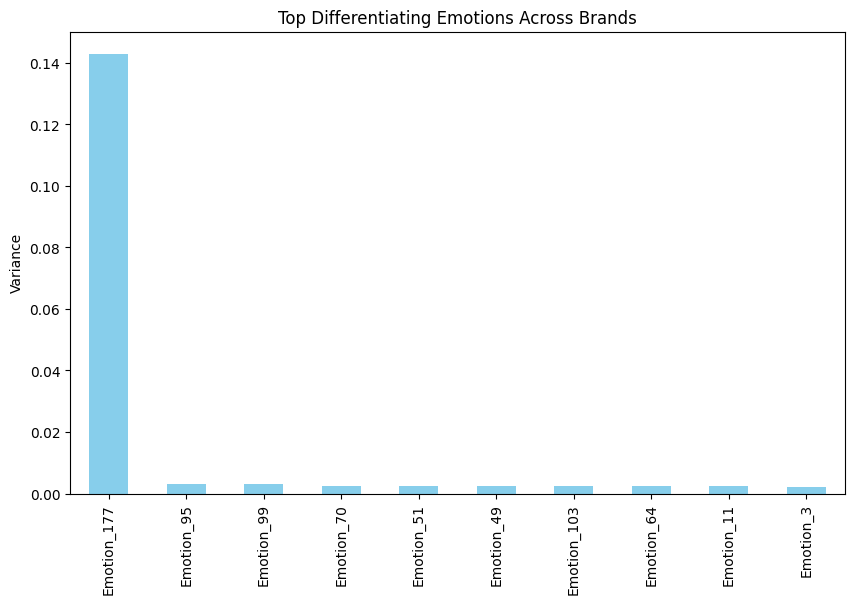

In [46]:
# Check if emotion_variance_sorted is empty
if emotion_variance_sorted.empty:
    print("No valid variance data to plot. Please check the input data.")
else:
    # Plot bar chart of top differentiating emotions
    plt.figure(figsize=(10, 6))
    emotion_variance_sorted.head(10).plot(kind="bar", color="skyblue")
    plt.title("Top Differentiating Emotions Across Brands")
    plt.ylabel("Variance")
    plt.show()

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset (assuming it's already cleaned)
file_path = "Cleaned_Database_test_ds.xlsx"
df_cleaned = pd.read_excel(file_path)

# Identify emotion columns
emotion_columns = [col for col in df_cleaned.columns if "Emotion_" in col]

# Aggregate emotions by brand
brand_emotion_summary = df_cleaned.groupby("Brand")[emotion_columns].mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=False)
plt.title("Relative Strength of Emotions by Brand")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [49]:
# Calculate variance of emotions across brands
emotion_variance = brand_emotion_summary.var(axis=0)

# Sort emotions by variance
emotion_variance_sorted = emotion_variance.sort_values(ascending=False)

# Plot bar chart of top differentiating emotions
if emotion_variance_sorted.empty:
    print("No valid variance data to plot. Please check the input data.")
else:
    plt.figure(figsize=(10, 6))
    emotion_variance_sorted.head(10).plot(kind="bar", color="skyblue")
    plt.title("Top Differentiating Emotions Across Brands")
    plt.ylabel("Variance")
    plt.show()

No valid variance data to plot. Please check the input data.


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = df_cleaned[emotion_columns]
y = df_cleaned["Consideration"]

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients
coefficients = pd.DataFrame({"Emotion": emotion_columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

# Plot bar chart of top drivers
plt.figure(figsize=(10, 6))
coefficients.head(10).plot(x="Emotion", y="Coefficient", kind="bar", color="orange")
plt.title("Top Drivers of Consideration")
plt.ylabel("Coefficient")
plt.show()

In [52]:
# Print emotion_columns to check if it's populated correctly
print("Emotion columns:", emotion_columns)

Emotion columns: []


In [53]:
# Display the first few rows of emotion_data
print("First few rows of emotion_data:")
print(emotion_data.head())

# Check for missing values
print("Missing values in emotion_data:")
print(emotion_data.isnull().sum())

# Check data types
print("Data types in emotion_data:")
print(emotion_data.dtypes)

First few rows of emotion_data:
   Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Emotion_6  Emotion_7  Emotion_8  Emotion_9  ...  Emotion_167  Emotion_168  \
0        0.0        0.0        0.0        0.0  ...          0.0          0.0   
1        0.0        0.0        0.0        0.0  ...          0.0          0.0   
2        0.0        0.0        0.0        0.0  ...          0.0          0.0   
3        NaN        NaN        NaN        NaN  ...          NaN          NaN   
4        0.0        0.0        0.0        0.0  ...          0.0          0.0   

   Emotion_169  Emotion_170  Emotion_171  Emotion_172  Emoti

In [54]:
emotion_data = emotion_data.dropna(axis=1, how='all')

In [55]:
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')

In [56]:
emotion_data = emotion_data.dropna(axis=0, how='all')

In [57]:
# Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df_cleaned["Brand"]).mean()

# Display the aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

Brand emotion summary:
         Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
Brand                                                                       
Brand_1   0.064000   0.056000   0.024000   0.064000   0.072000   0.112000   
Brand_2   0.036036   0.036036   0.027027   0.180180   0.036036   0.090090   
Brand_3   0.142857   0.083333   0.011905   0.166667   0.047619   0.095238   
Brand_4   0.070866   0.094488   0.047244   0.078740   0.062992   0.062992   
Brand_5   0.048387   0.096774   0.000000   0.080645   0.016129   0.129032   
Brand_6   0.050725   0.065217   0.021739   0.079710   0.079710   0.144928   
Brand_7   0.035088   0.175439   0.017544   0.087719   0.000000   0.157895   

         Emotion_6  Emotion_7  Emotion_8  Emotion_9  ...  Emotion_167  \
Brand                                                ...                
Brand_1   0.056000   0.024000   0.080000   0.152000  ...     0.008000   
Brand_2   0.072072   0.054054   0.081081   0.171171  ...     0.0

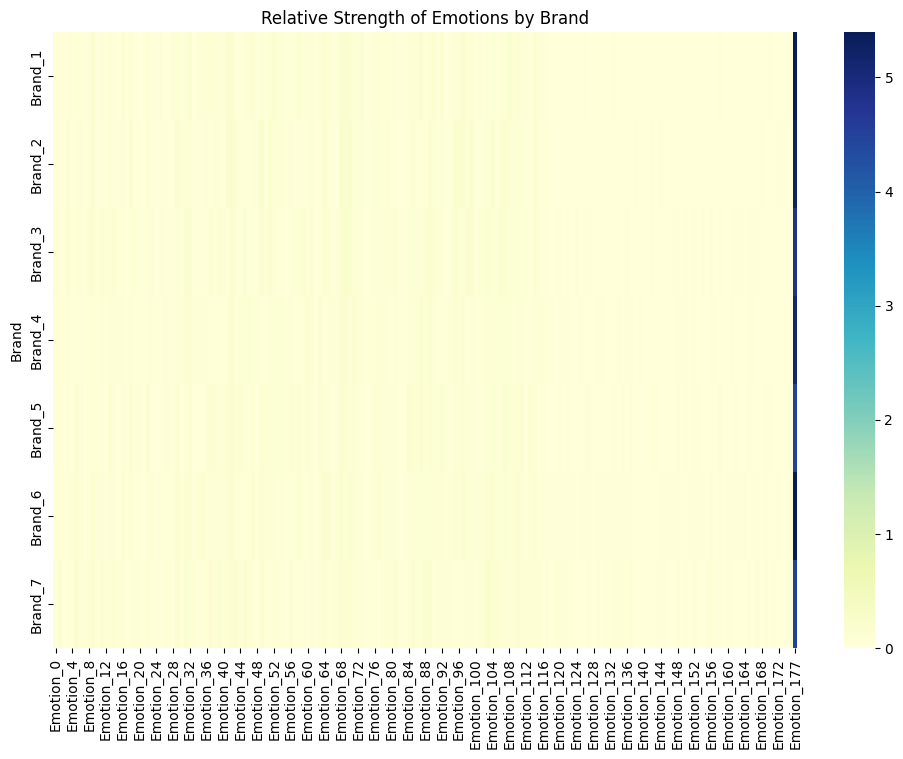

In [58]:
# Check if brand_emotion_summary is empty
if brand_emotion_summary.empty:
    print("No valid data to plot. Please check the input data.")
else:
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(brand_emotion_summary, cmap="YlGnBu", annot=False)
    plt.title("Relative Strength of Emotions by Brand")
    plt.show()

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Rename columns for clarity
# Assuming emotion columns are unnamed (e.g., "Unnamed: X"), rename them systematically
df.columns = [f"Emotion_{i}" if "Unnamed" in str(col) else col for i, col in enumerate(df.columns)]

# Step 3: Identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Step 4: Select emotion data
emotion_data = df[emotion_columns]

# Step 5: Clean emotion data
# Convert columns to numeric and drop rows/columns with all NaN values
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN

# Debugging: Check cleaned emotion_data
print("Cleaned emotion_data:")
print(emotion_data.head())

# Step 6: Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Debugging: Check aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

# Step 7: Plot heatmap with improved color scheme
if brand_emotion_summary.empty:
    print("No valid data to plot. Please check the input data.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        brand_emotion_summary,
        cmap="coolwarm",  # Improved color scheme
        annot=False,      # Set to True if you want annotations
        center=0          # Center the color scale at 0 for diverging colors
    )
    plt.title("Relative Strength of Emotions by Brand")
    plt.xlabel("Emotions")
    plt.ylabel("Brands")
    plt.show()

Cleaned emotion_data:
Empty DataFrame
Columns: []
Index: []
Brand emotion summary:
Empty DataFrame
Columns: []
Index: []
No valid data to plot. Please check the input data.


In [62]:
# Rename columns for clarity
non_emotion_columns = ["Brand", "Consideration"]  # Add other non-emotion columns if needed
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Rename emotion columns systematically
df.columns = non_emotion_columns + [f"Emotion_{i}" for i in range(len(emotion_columns))]

# Re-identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Display updated column names
print("Updated column names:")
print(df.columns)

Updated column names:
Index(['Brand', 'Consideration', 'Emotion_0', 'Emotion_1', 'Emotion_2',
       'Emotion_3', 'Emotion_4', 'Emotion_5', 'Emotion_6', 'Emotion_7',
       ...
       'Emotion_168', 'Emotion_169', 'Emotion_170', 'Emotion_171',
       'Emotion_172', 'Emotion_173', 'Emotion_174', 'Emotion_175',
       'Emotion_176', 'Emotion_177'],
      dtype='object', length=180)


In [63]:
# Select emotion data
emotion_data = df[emotion_columns]

# Convert columns to numeric
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')

# Drop rows where all emotion variables are NaN
emotion_data = emotion_data.dropna(axis=0, how='all')

# Drop columns with all NaN values
emotion_data = emotion_data.dropna(axis=1, how='all')

# Display cleaned emotion data
print("Cleaned emotion_data:")
print(emotion_data.head())

Cleaned emotion_data:
   Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Emotion_6  Emotion_7  Emotion_8  Emotion_9  ...  Emotion_167  Emotion_168  \
0        0.0        0.0        0.0        0.0  ...          0.0          0.0   
1        0.0        0.0        0.0        0.0  ...          0.0          0.0   
2        0.0        0.0        0.0        0.0  ...          0.0          0.0   
3        NaN        NaN        NaN        NaN  ...          NaN          NaN   
4        0.0        0.0        0.0        0.0  ...          0.0          0.0   

   Emotion_169  Emotion_170  Emotion_171  Emotion_172  Emotion_173  \


In [64]:
# Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Display the aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

Brand emotion summary:
       Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
Brand                                                                     
0            0.0        0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0        0.0   
3            NaN        NaN        NaN        NaN        NaN        NaN   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
1549         NaN        NaN        NaN        NaN        NaN        NaN   
1550         NaN        NaN        NaN        NaN        NaN        NaN   
1551         NaN        NaN        NaN        NaN        NaN        NaN   
1552         NaN        NaN        NaN        NaN        NaN        NaN   
1553         NaN        NaN        NaN        NaN        NaN        NaN   

 

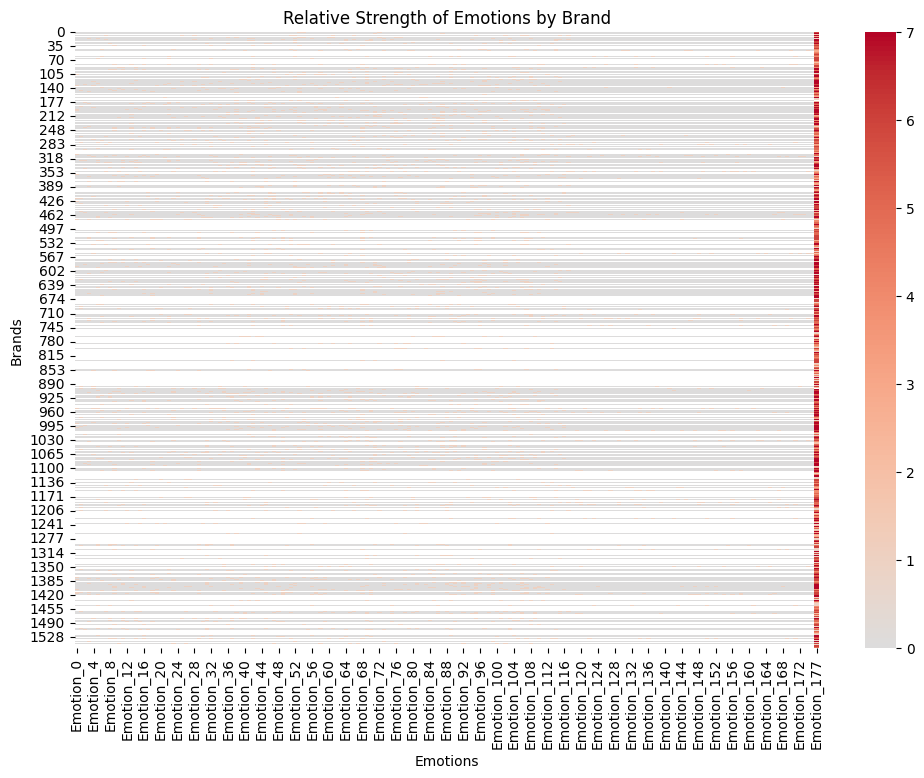

In [65]:
# Check if brand_emotion_summary is empty
if brand_emotion_summary.empty:
    print("No valid data to plot. Please check the input data.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        brand_emotion_summary,
        cmap="coolwarm",  # Improved color scheme
        annot=False,      # Set to True if you want annotations
        center=0          # Center the color scale at 0 for diverging colors
    )
    plt.title("Relative Strength of Emotions by Brand")
    plt.xlabel("Emotions")
    plt.ylabel("Brands")
    plt.show()

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Rename columns for clarity
non_emotion_columns = ["Brand", "Consideration"]  # Add other non-emotion columns if needed
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Rename emotion columns systematically
df.columns = non_emotion_columns + [f"Emotion_{i}" for i in range(len(emotion_columns))]

# Re-identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Step 3: Clean emotion data
emotion_data = df[emotion_columns]
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN

# Debugging: Check cleaned emotion data
print("Cleaned emotion_data:")
print(emotion_data.head())

# Step 4: Prepare data for regression
X = emotion_data  # Independent variables (emotions)
y = df["Consideration"]  # Dependent variable

# Step 5: Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 6: Extract coefficients
coefficients = pd.DataFrame({"Emotion": emotion_columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)  # Sort by coefficient

# Debugging: Display top drivers
print("Top drivers of Consideration:")
print(coefficients.head(10))

# Step 7: Plot bar chart of top drivers
plt.figure(figsize=(12, 8))
sns.barplot(
    data=coefficients.head(10),
    x="Coefficient",
    y="Emotion",
    palette="Blues_d"  # Sequential color scheme
)
plt.title("Top Drivers of Consideration")
plt.xlabel("Coefficient")
plt.ylabel("Emotion")
plt.show()

Cleaned emotion_data:
   Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Emotion_6  Emotion_7  Emotion_8  Emotion_9  ...  Emotion_167  Emotion_168  \
0        0.0        0.0        0.0        0.0  ...          0.0          0.0   
1        0.0        0.0        0.0        0.0  ...          0.0          0.0   
2        0.0        0.0        0.0        0.0  ...          0.0          0.0   
3        NaN        NaN        NaN        NaN  ...          NaN          NaN   
4        0.0        0.0        0.0        0.0  ...          0.0          0.0   

   Emotion_169  Emotion_170  Emotion_171  Emotion_172  Emotion_173  \


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [67]:
# Check for missing values in X
print("Missing values in X:")
print(X.isnull().sum())

Missing values in X:
Emotion_0      821
Emotion_1      821
Emotion_2      821
Emotion_3      821
Emotion_4      821
              ... 
Emotion_172    821
Emotion_173    821
Emotion_174    821
Emotion_175    821
Emotion_177      7
Length: 177, dtype: int64


In [68]:
X = X.dropna(axis=0, how='any')  # Drop rows with any NaN
y = y.loc[X.index]  # Ensure y matches the filtered X

In [69]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [70]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X, y)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoostingRegressor()

In [71]:
# Verify no missing values remain
print("Missing values in X after cleaning:")
print(X.isnull().sum())

Missing values in X after cleaning:
Emotion_0      0
Emotion_1      0
Emotion_2      0
Emotion_3      0
Emotion_4      0
              ..
Emotion_172    0
Emotion_173    0
Emotion_174    0
Emotion_175    0
Emotion_177    0
Length: 177, dtype: int64


In [72]:
from sklearn.linear_model import LinearRegression

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients
coefficients = pd.DataFrame({"Emotion": X.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

# Display top drivers
print("Top drivers of Consideration:")
print(coefficients.head(10))

Top drivers of Consideration:
         Emotion  Coefficient
30    Emotion_30     0.934247
4      Emotion_4     0.099799
0      Emotion_0     0.084134
5      Emotion_5     0.080318
10    Emotion_10     0.075279
157  Emotion_157     0.070983
138  Emotion_138     0.056375
141  Emotion_141     0.055000
24    Emotion_24     0.048166
16    Emotion_16     0.041981


C:\Users\hp\AppData\Local\Temp\ipykernel_24252\1432532532.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


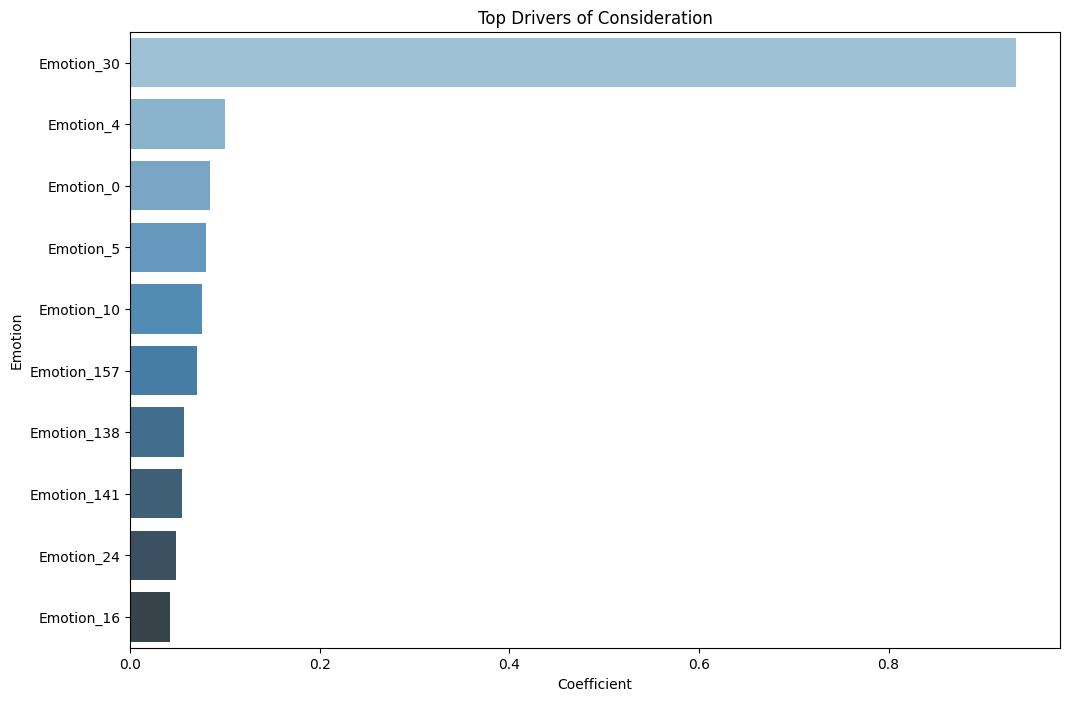

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(
    data=coefficients.head(10),
    x="Coefficient",
    y="Emotion",
    palette="Blues_d"  # Sequential color scheme
)
plt.title("Top Drivers of Consideration")
plt.xlabel("Coefficient")
plt.ylabel("Emotion")
plt.show()

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Rename columns for clarity
non_emotion_columns = ["Brand", "Consideration"]  # Add other non-emotion columns if needed
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Rename emotion columns systematically
df.columns = non_emotion_columns + [f"Emotion_{i}" for i in range(len(emotion_columns))]

# Re-identify emotion columns
emotion_columns = [col for col in df.columns if "Emotion_" in col]

# Step 3: Clean emotion data
emotion_data = df[emotion_columns]
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN

# Debugging: Check cleaned emotion data
print("Cleaned emotion_data:")
print(emotion_data.head())

# Step 4: Standardize the emotion data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(emotion_data)

# Step 5: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Step 6: Add PCA results to DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
df_pca["Brand"] = df["Brand"]

# Debugging: Display PCA DataFrame
print("PCA Results:")
print(df_pca.head())

# Step 7: Plot scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Brand",
    data=df_pca,
    palette="tab10",  # Use a categorical color palette
    alpha=0.7,        # Add transparency for better visualization
    s=100             # Adjust marker size
)
plt.title("PCA Visualization of Brands")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside the plot
plt.grid(True)
plt.show()

Cleaned emotion_data:
   Emotion_0  Emotion_1  Emotion_2  Emotion_3  Emotion_4  Emotion_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Emotion_6  Emotion_7  Emotion_8  Emotion_9  ...  Emotion_167  Emotion_168  \
0        0.0        0.0        0.0        0.0  ...          0.0          0.0   
1        0.0        0.0        0.0        0.0  ...          0.0          0.0   
2        0.0        0.0        0.0        0.0  ...          0.0          0.0   
3        NaN        NaN        NaN        NaN  ...          NaN          NaN   
4        0.0        0.0        0.0        0.0  ...          0.0          0.0   

   Emotion_169  Emotion_170  Emotion_171  Emotion_172  Emotion_173  \


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Missing values in emotion_data after cleaning:
Index              0
a follower         0
a gossip           0
a show-off         0
absentminded       0
                  ..
unreasonable       0
unreliable         0
unsophisticated    0
uptight            0
defiant            0
Length: 178, dtype: int64


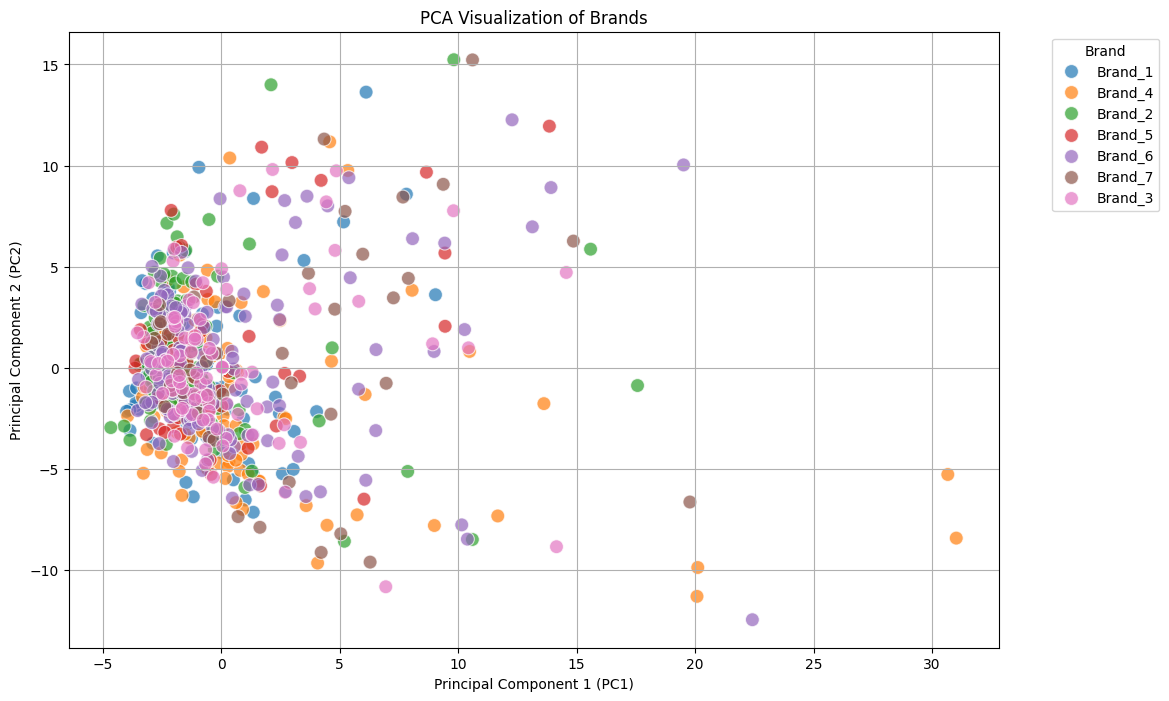

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Identify emotion columns
non_emotion_columns = ["Brand", "Consideration"]  # Non-emotion columns
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Step 3: Select and clean emotion data
emotion_data = df[emotion_columns]
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN

# Step 4: Handle remaining missing values
imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
emotion_data = pd.DataFrame(imputer.fit_transform(emotion_data), columns=emotion_data.columns)

# Step 5: Verify cleaned data
print("Missing values in emotion_data after cleaning:")
print(emotion_data.isnull().sum())

# Step 6: Standardize the emotion data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(emotion_data)

# Step 7: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Step 8: Add PCA results to DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
df_pca["Brand"] = df["Brand"]  # Add the Brand column for visualization

# Step 9: Plot scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Brand",
    data=df_pca,
    palette="tab10",  # Use a categorical color palette
    alpha=0.7,        # Add transparency for better visualization
    s=100             # Adjust marker size
)
plt.title("PCA Visualization of Brands")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside the plot
plt.grid(True)
plt.show()

Brand emotion summary:
          Index  a follower  a gossip  a show-off  absentminded  \
Brand                                                             
Brand_1   110.5    0.047244  0.062992    0.055118      0.023622   
Brand_2   554.5    0.068966  0.034483    0.043103      0.025862   
Brand_3  1442.5    0.034483  0.137931    0.080460      0.011494   
Brand_4   332.5    0.077519  0.069767    0.093023      0.046512   
Brand_5   776.5    0.000000  0.055556    0.092593      0.000000   
Brand_6   998.5    0.040268  0.053691    0.067114      0.026846   
Brand_7  1220.5    0.020833  0.020833    0.187500      0.000000   

         authoritarian  childish  complicated  conformist     crazy  ...  \
Brand                                                                ...   
Brand_1       0.062992  0.070866     0.110236    0.055118  0.023622  ...   
Brand_2       0.172414  0.034483     0.086207    0.077586  0.034483  ...   
Brand_3       0.160920  0.045977     0.103448    0.068966  0.034483  

ValueError: x and y must have same first dimension, but have shapes (179,) and (178,)

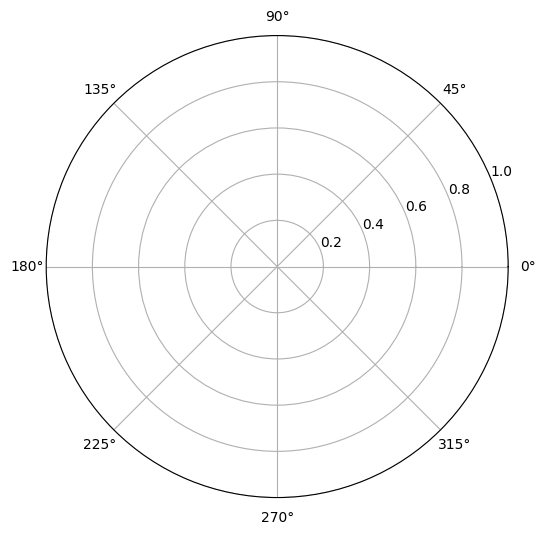

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Identify emotion columns
non_emotion_columns = ["Brand", "Consideration"]  # Non-emotion columns
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Step 3: Clean emotion data
emotion_data = df[emotion_columns]
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN

# Step 4: Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Debugging: Check aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

# Step 5: Define a function to plot radar charts
def plot_radar_chart(data, brand):
    """
    Plots a radar chart for the emotional profile of a specific brand.
    """
    labels = data.columns
    values = data.loc[brand].values

    # Create angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]  # Close the loop
    angles += angles[:1]

    # Plot the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.3)  # Fill with transparency
    ax.plot(angles, values, color='darkblue', linewidth=2)  # Outline
    ax.set_yticklabels([])  # Remove radial axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels for readability
    plt.title(f"Emotional Profile for {brand}", size=14)
    plt.show()

# Step 6: Generate radar charts for individual brands
if not brand_emotion_summary.empty:
    for brand in brand_emotion_summary.index:
        plot_radar_chart(brand_emotion_summary, brand)
else:
    print("No valid data to plot. Please check the input data.")

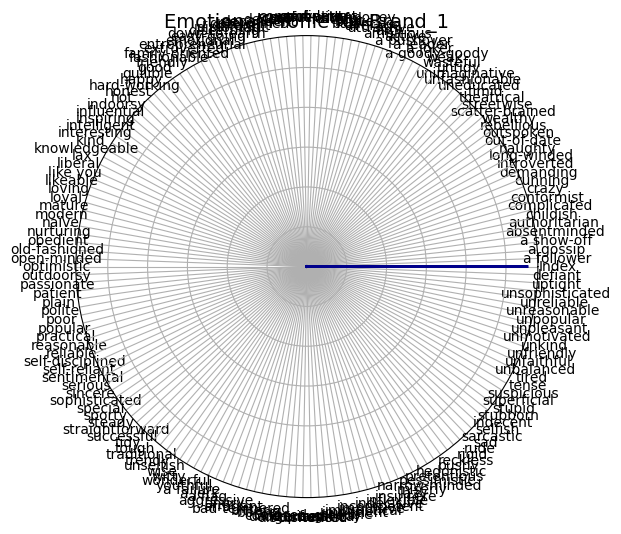

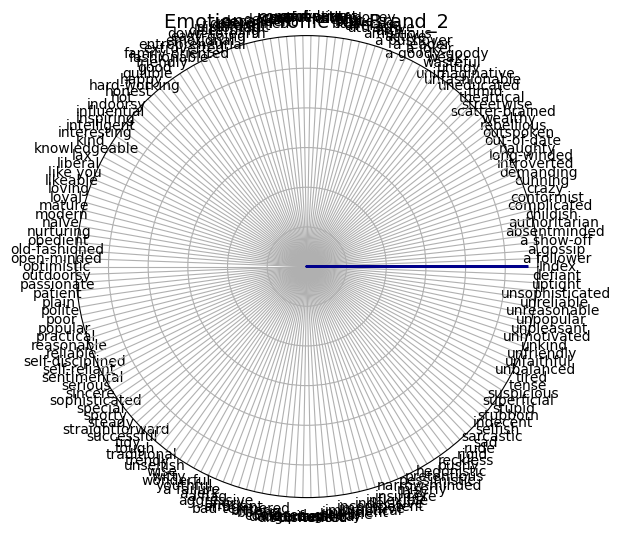

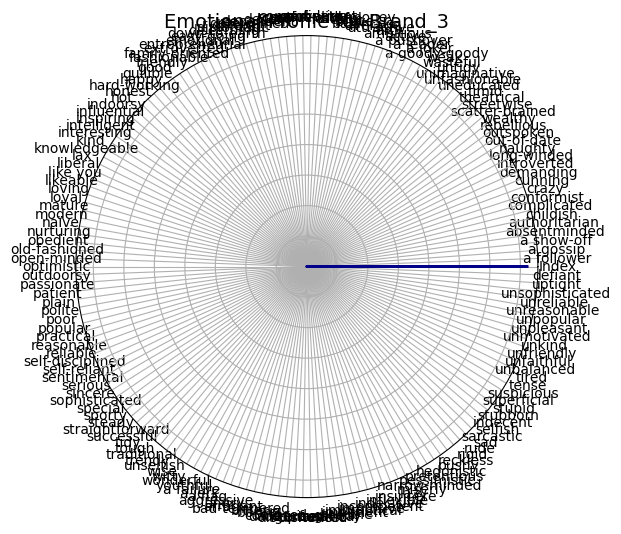

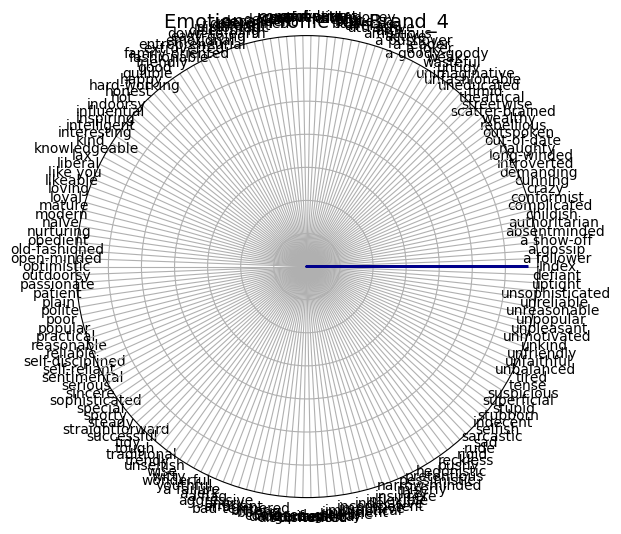

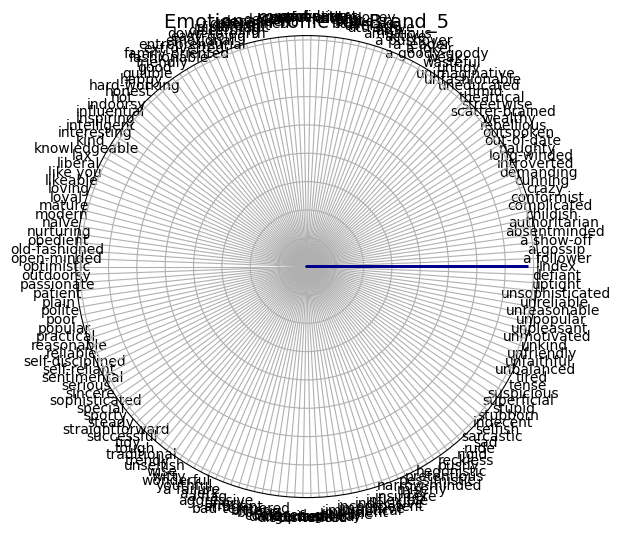

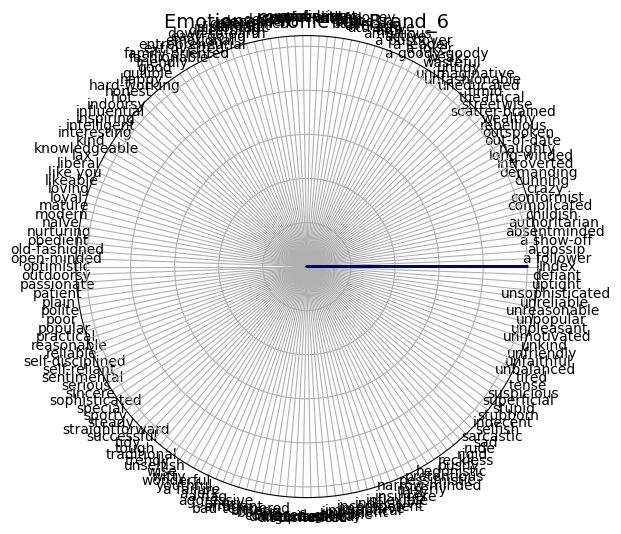

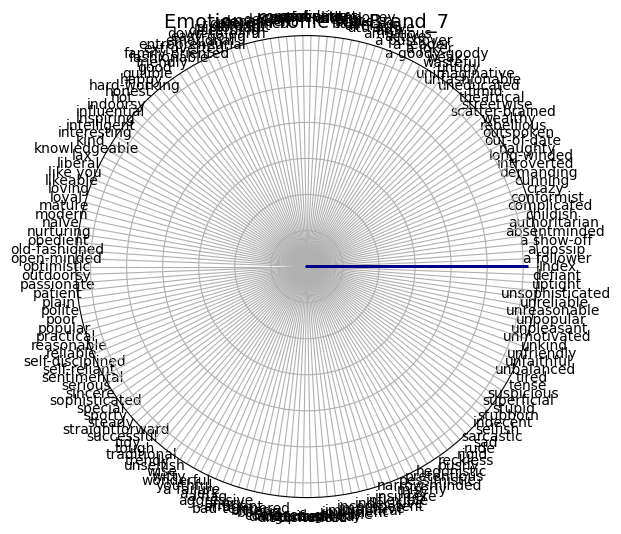

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Identify emotion columns
non_emotion_columns = ["Brand", "Consideration"]  # Non-emotion columns
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Step 3: Clean emotion data
emotion_data = df[emotion_columns]
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN

# Step 4: Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Debugging: Check aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

# Step 5: Define a function to plot radar charts
def plot_radar_chart(data, brand, top_n=10):
    """
    Plots a radar chart for the emotional profile of a specific brand.
    """
    # Select top N emotions based on variance across brands
    top_emotions = data.var().sort_values(ascending=False).head(top_n).index
    labels = top_emotions.tolist()
    values = data.loc[brand, top_emotions].values.tolist()

    # Close the loop
    values += [values[0]]

    # Create angles
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += [angles[0]]  # Close the loop

    # Plot the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.3)  # Fill with transparency
    ax.plot(angles, values, color='darkblue', linewidth=2)  # Outline
    ax.set_yticklabels([])  # Remove radial axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, rotation=45, fontsize=10)  # Rotate labels for readability
    plt.title(f"Emotional Profile for {brand}", size=14)
    plt.show()

# Step 6: Generate radar charts for individual brands
if not brand_emotion_summary.empty:
    for brand in brand_emotion_summary.index:
        plot_radar_chart(brand_emotion_summary, brand, top_n=10)
else:
    print("No valid data to plot. Please check the input data.")

Brand emotion summary:
          Index  a follower  a gossip  a show-off  absentminded  \
Brand                                                             
Brand_1   110.5    0.047244  0.062992    0.055118      0.023622   
Brand_2   554.5    0.068966  0.034483    0.043103      0.025862   
Brand_3  1442.5    0.034483  0.137931    0.080460      0.011494   
Brand_4   332.5    0.077519  0.069767    0.093023      0.046512   
Brand_5   776.5    0.000000  0.055556    0.092593      0.000000   
Brand_6   998.5    0.040268  0.053691    0.067114      0.026846   
Brand_7  1220.5    0.020833  0.020833    0.187500      0.000000   

         authoritarian  childish  complicated  conformist     crazy  ...  \
Brand                                                                ...   
Brand_1       0.062992  0.070866     0.110236    0.055118  0.023622  ...   
Brand_2       0.172414  0.034483     0.086207    0.077586  0.034483  ...   
Brand_3       0.160920  0.045977     0.103448    0.068966  0.034483  

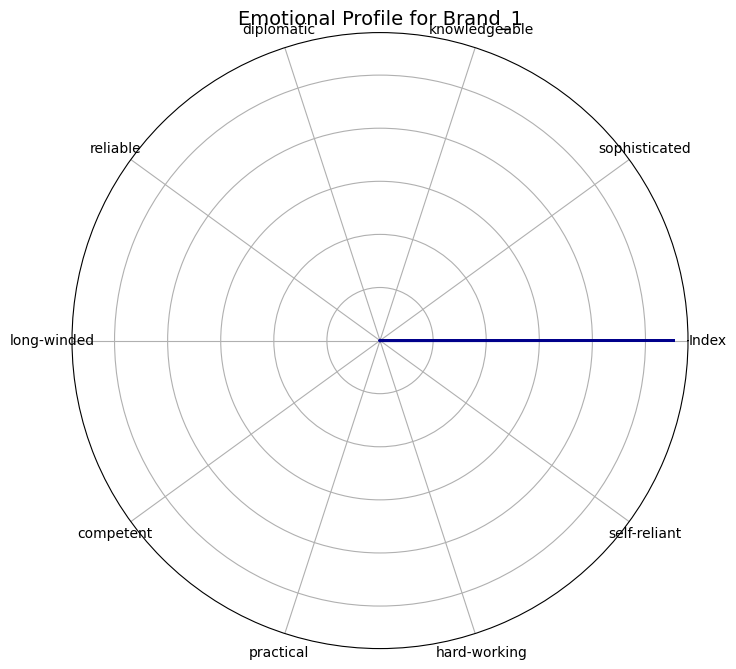

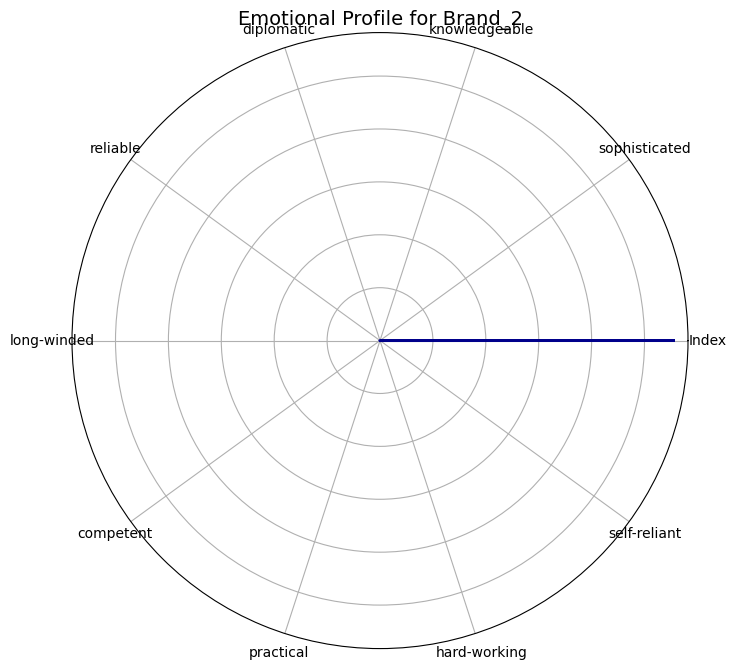

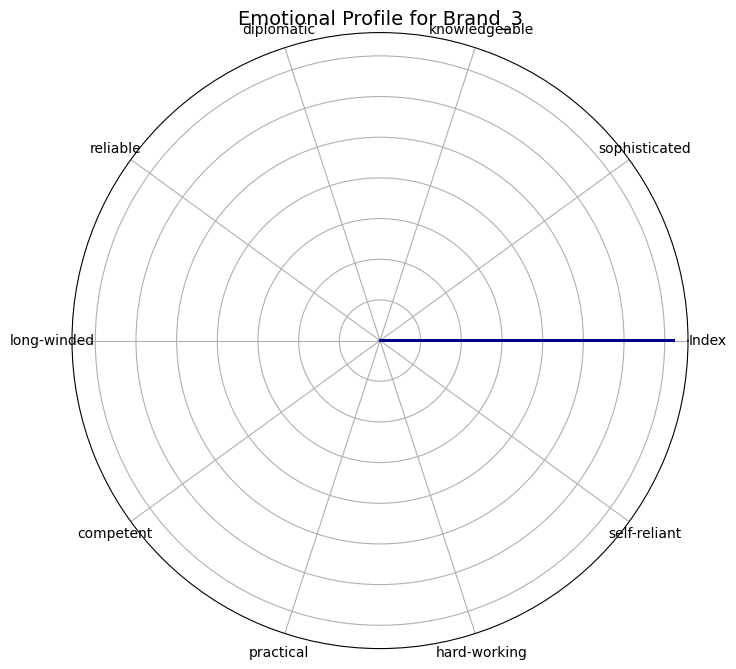

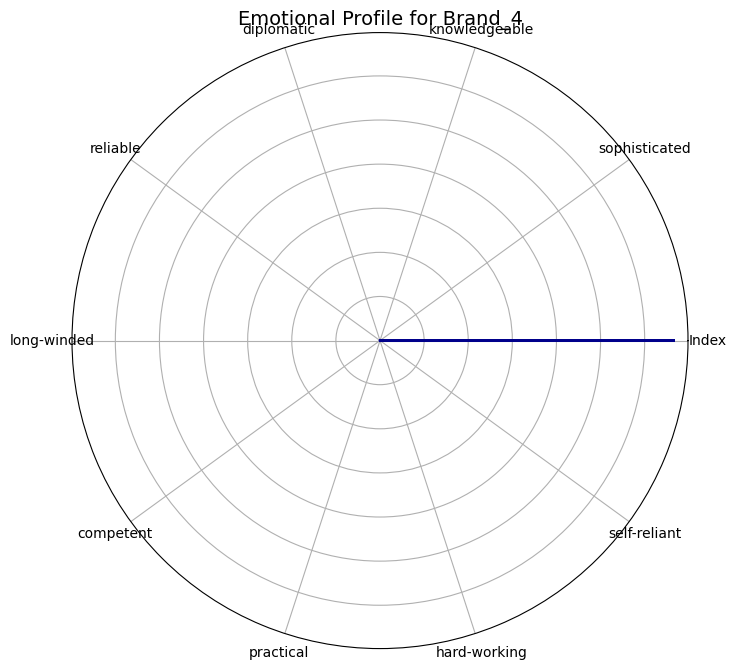

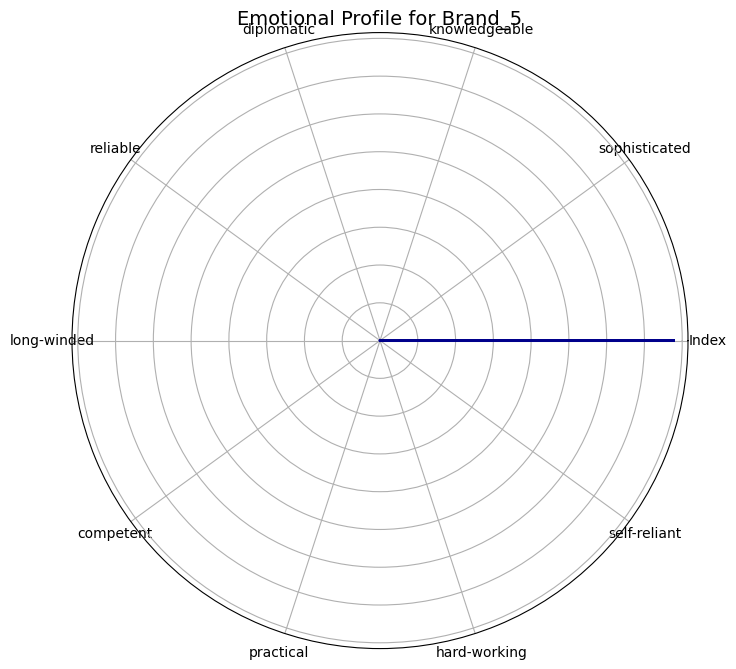

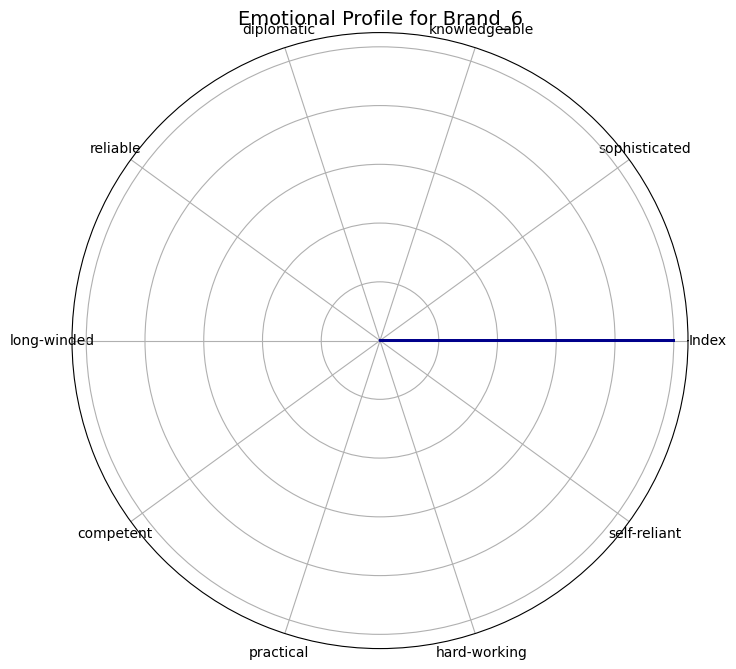

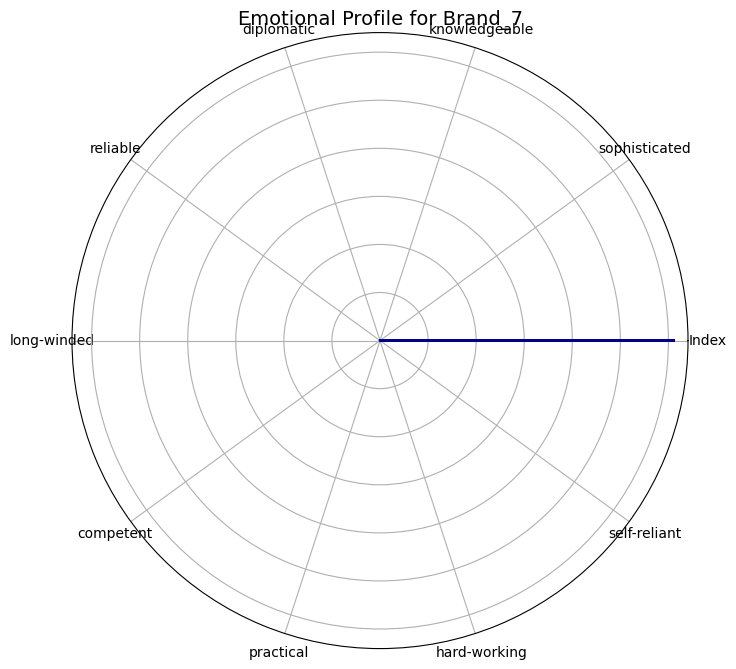

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Identify emotion columns
non_emotion_columns = ["Brand", "Consideration"]  # Non-emotion columns
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Step 3: Clean emotion data
emotion_data = df[emotion_columns]
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN

# Step 4: Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Debugging: Check aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

# Step 5: Define a function to plot radar charts
def plot_radar_chart(data, brand, top_n=10):
    """
    Plots a radar chart for the emotional profile of a specific brand.
    """
    # Select top N emotions based on variance across brands
    top_emotions = data.var().sort_values(ascending=False).head(top_n).index
    labels = top_emotions.tolist()
    values = data.loc[brand, top_emotions].values.tolist()

    # Close the loop
    values += [values[0]]

    # Create angles
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += [angles[0]]  # Close the loop

    # Plot the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.3)  # Fill with transparency
    ax.plot(angles, values, color='darkblue', linewidth=2)  # Outline
    ax.set_yticklabels([])  # Remove radial axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, rotation=45, fontsize=10)  # Rotate labels for readability
    plt.title(f"Emotional Profile for {brand}", size=14)
    plt.show()

# Step 6: Generate radar charts for individual brands
if not brand_emotion_summary.empty:
    for brand in brand_emotion_summary.index:
        plot_radar_chart(brand_emotion_summary, brand, top_n=10)
else:
    print("No valid data to plot. Please check the input data.")

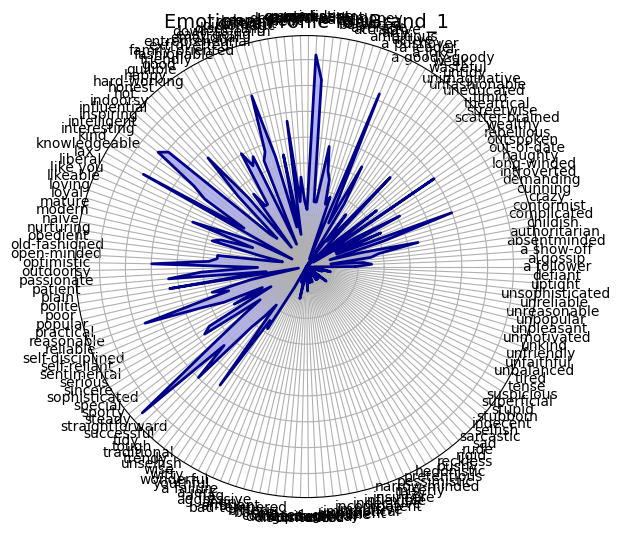

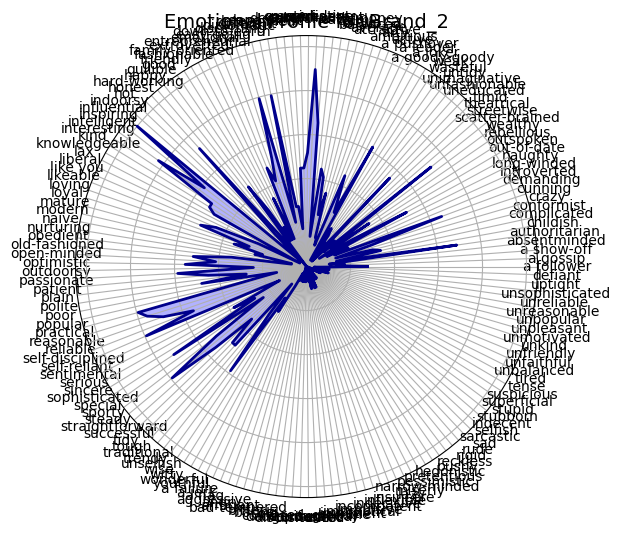

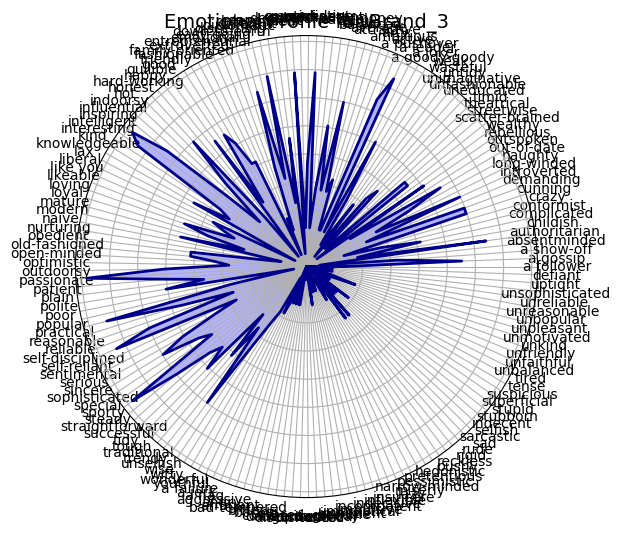

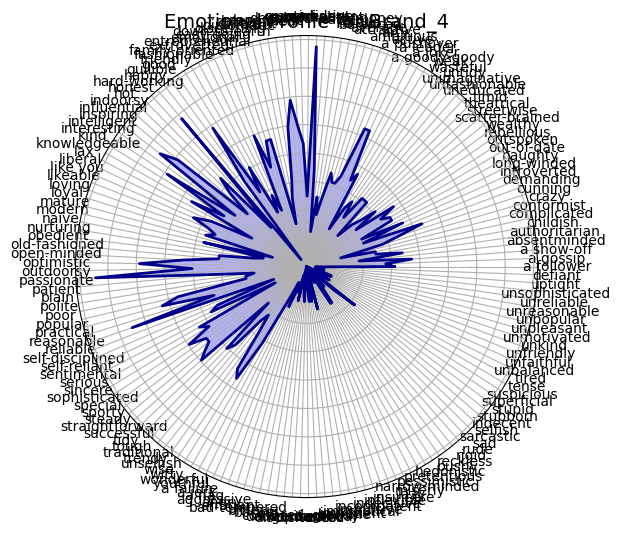

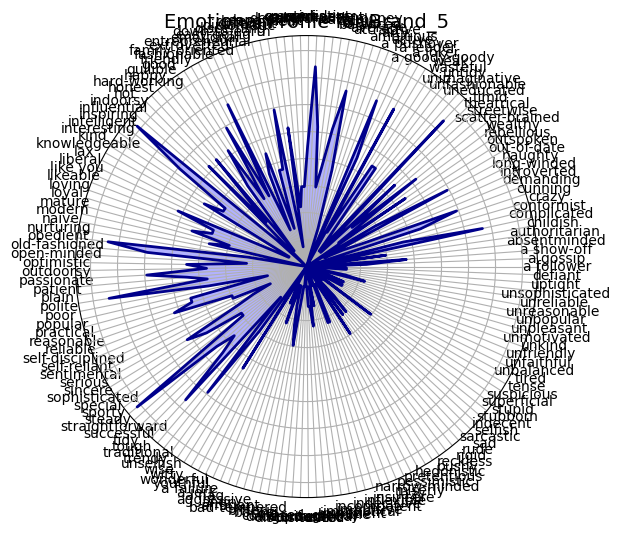

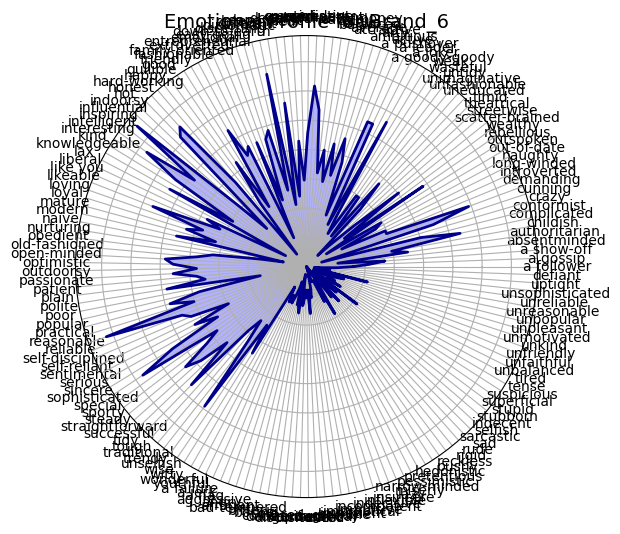

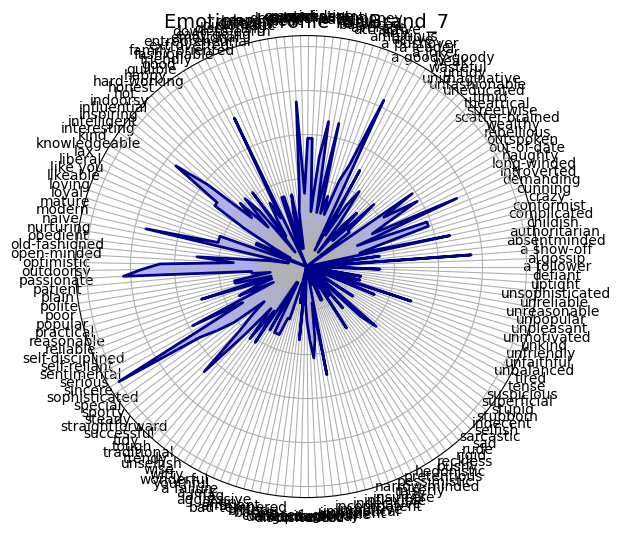

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Identify emotion columns (excluding non-emotion columns like "Index")
non_emotion_columns = ["Brand", "Consideration", "Index"]  # Add other non-emotion columns if needed
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Step 3: Clean emotion data
emotion_data = df[emotion_columns]
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN

# Step 4: Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Step 5: Define a function to plot radar charts
def plot_radar_chart(data, brand):
    """
    Plots a radar chart for the emotional profile of a specific brand.
    """
    # Filter out non-emotion columns (e.g., "Index")
    labels = [col for col in data.columns if col != "Index"]
    values = data.loc[brand, labels].values.tolist()

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]  # Close the loop
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.3)  # Fill with transparency
    ax.plot(angles, values, color='darkblue', linewidth=2)  # Outline
    ax.set_yticklabels([])  # Remove radial axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels for readability
    plt.title(f"Emotional Profile for {brand}", size=14)
    plt.show()

# Step 6: Generate radar charts for individual brands
if not brand_emotion_summary.empty:
    for brand in brand_emotion_summary.index:
        plot_radar_chart(brand_emotion_summary, brand)
else:
    print("No valid data to plot. Please check the input data.")

Emotion data:
   a follower  a gossip  a show-off  absentminded  authoritarian  childish  \
0         0.0       0.0         0.0           0.0            0.0       0.0   
1         0.0       0.0         0.0           0.0            0.0       0.0   
2         0.0       0.0         0.0           0.0            0.0       0.0   
3         NaN       NaN         NaN           NaN            NaN       NaN   
4         0.0       0.0         0.0           0.0            0.0       0.0   

   complicated  conformist  crazy  cunning  ...  unfriendly  unkind  \
0          0.0         0.0    0.0      0.0  ...         0.0     0.0   
1          0.0         0.0    0.0      0.0  ...         0.0     0.0   
2          0.0         0.0    0.0      0.0  ...         0.0     0.0   
3          NaN         NaN    NaN      NaN  ...         NaN     NaN   
4          0.0         0.0    0.0      0.0  ...         0.0     0.0   

   unmotivated  unpleasant  unpopular  unreasonable  unreliable  \
0          0.0         

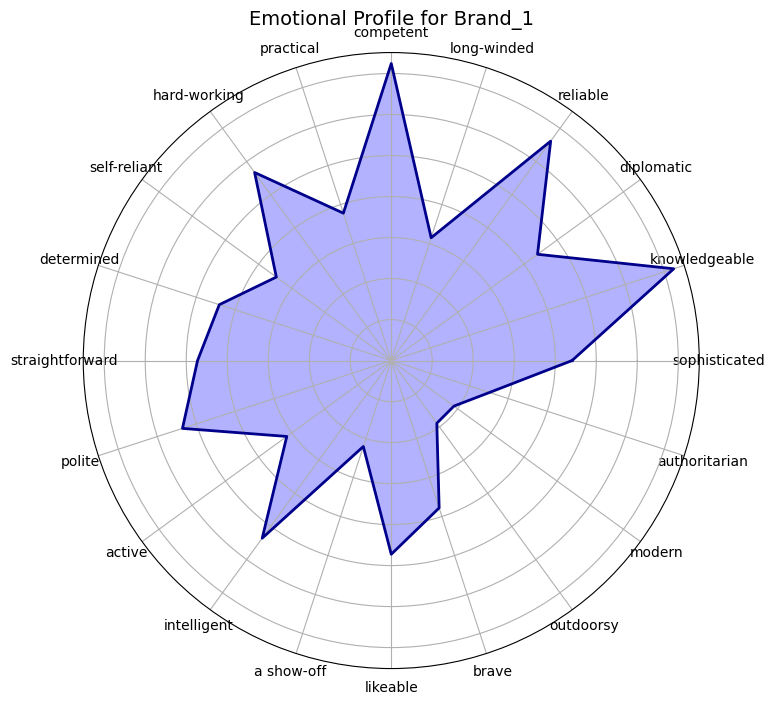

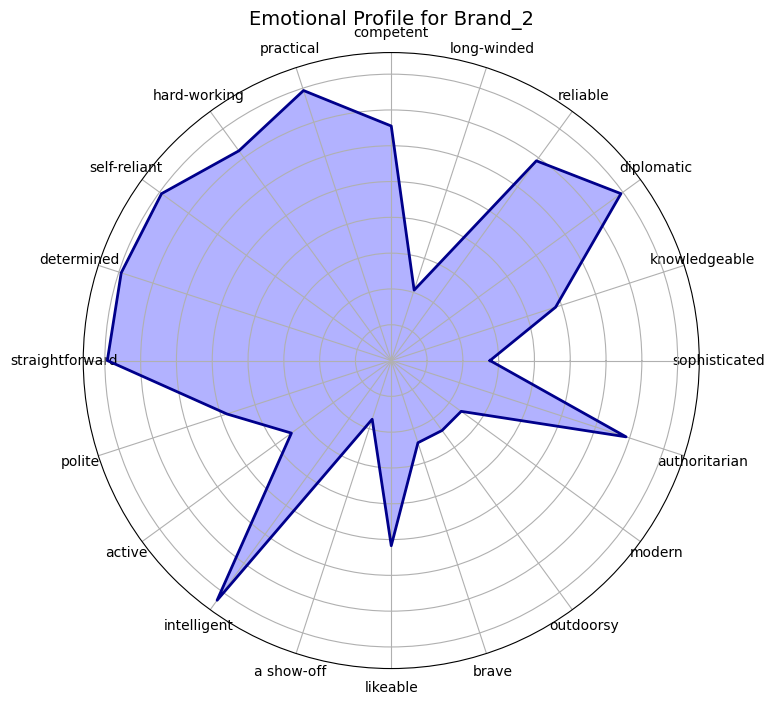

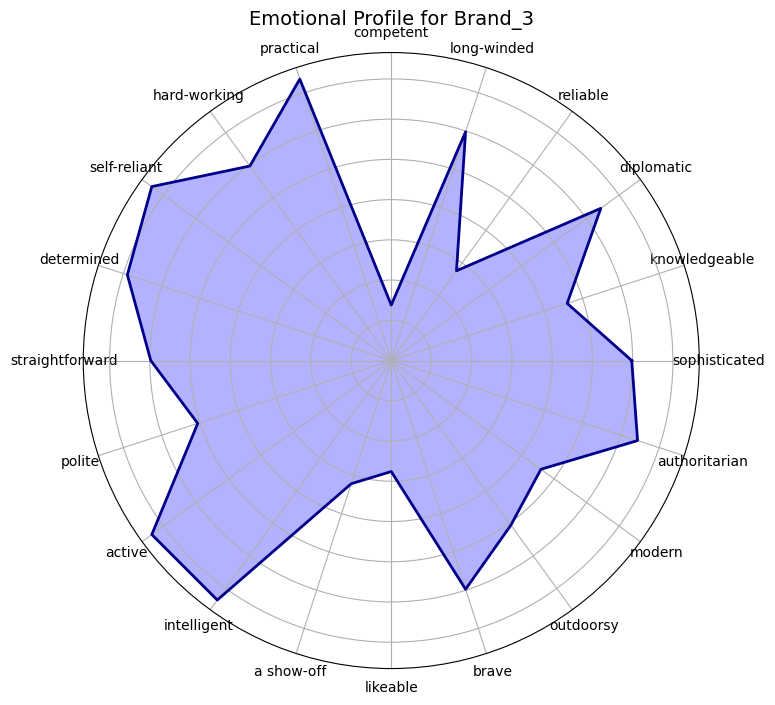

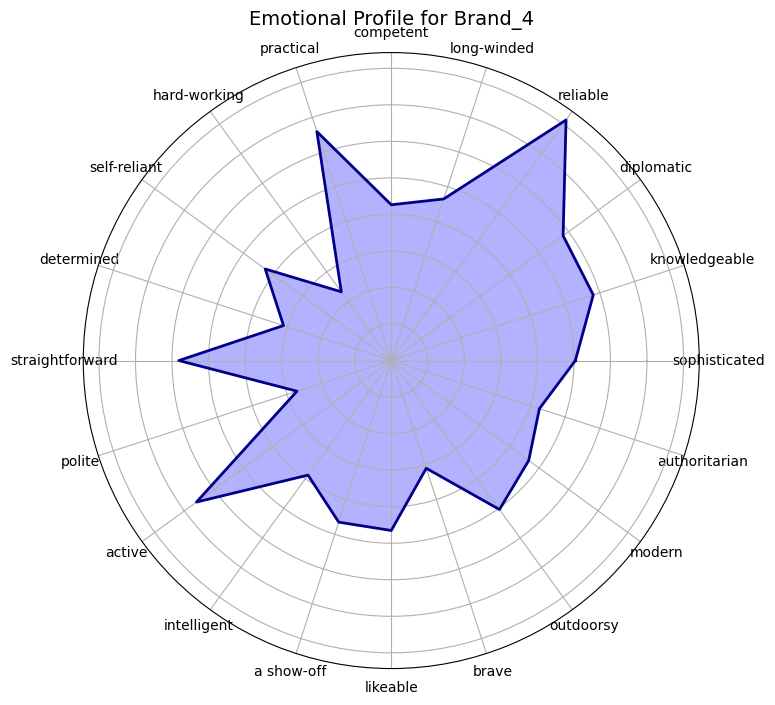

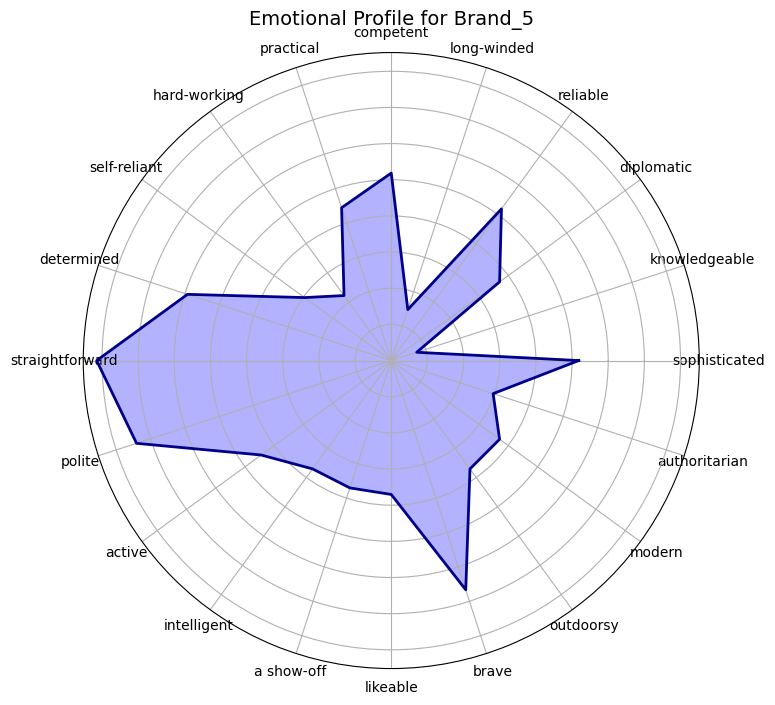

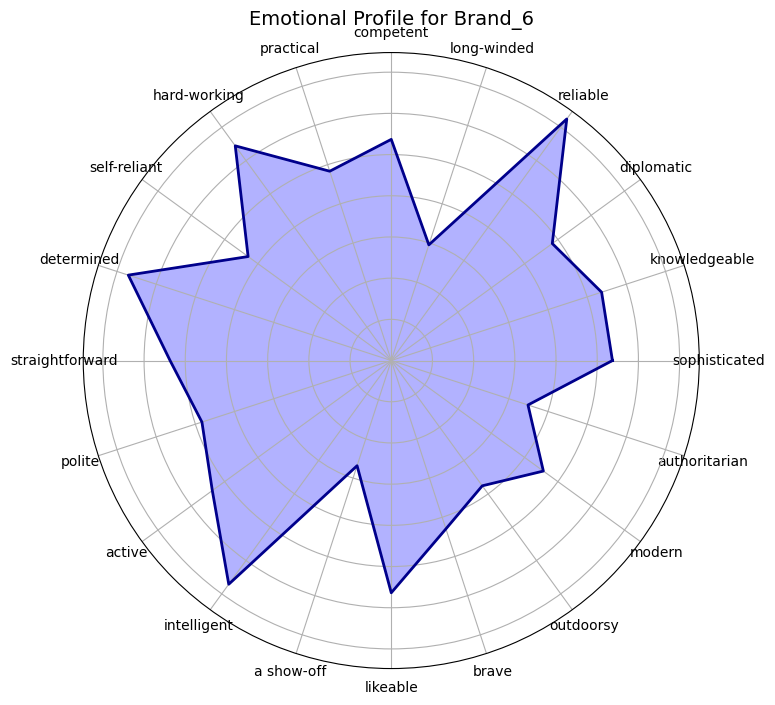

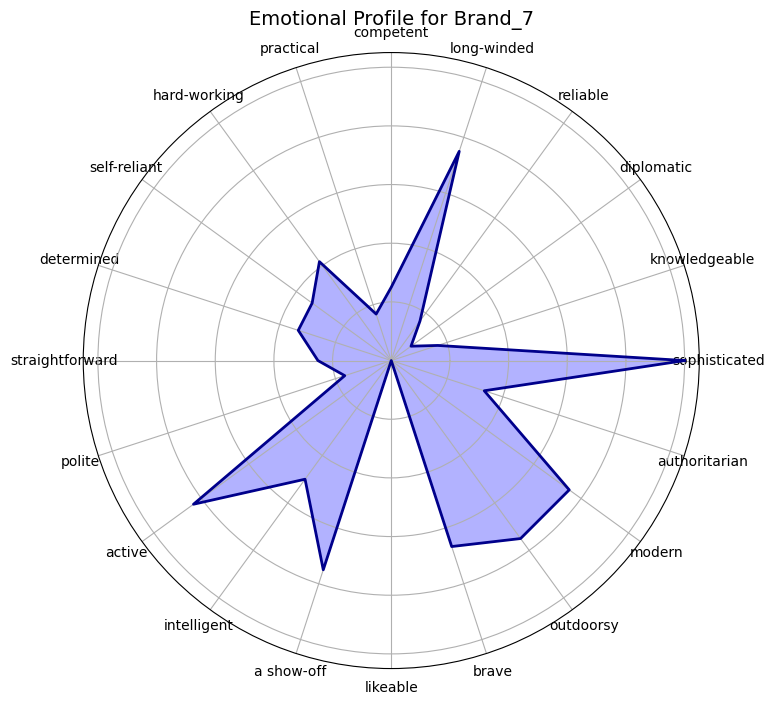

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

# Step 2: Identify non-emotion columns (including "Index")
non_emotion_columns = ["Brand", "Consideration", "Index"]  # Add other non-emotion columns if needed

# Step 3: Select only emotion columns
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Step 4: Select emotion data
emotion_data = df[emotion_columns]

# Debugging: Check emotion data
print("Emotion data:")
print(emotion_data.head())

# Step 5: Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Debugging: Check aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary)

# Step 6: Define a function to plot radar charts
def plot_radar_chart(data, brand, top_n=20):
    """
    Plots a radar chart for the emotional profile of a specific brand.
    """
    # Select top N emotions based on variance across brands
    top_emotions = data.var().sort_values(ascending=False).head(top_n).index
    labels = top_emotions.tolist()
    values = data.loc[brand, top_emotions].values.tolist()

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]  # Close the loop
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.3)  # Fill with transparency
    ax.plot(angles, values, color='darkblue', linewidth=2)  # Outline
    ax.set_yticklabels([])  # Remove radial axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, rotation=45, fontsize=10)  # Rotate labels for readability

    # Adjust the title position
    plt.title(f"Emotional Profile for {brand}", size=14, pad=20)  # Increase pad value to move title up

    plt.show()

# Step 7: Generate radar charts for individual brands
if not brand_emotion_summary.empty:
    for brand in brand_emotion_summary.index:
        plot_radar_chart(brand_emotion_summary, brand, top_n=20)
else:
    print("No valid data to plot. Please check the input data.")

Brand emotion summary:
          Index  a follower  a gossip  a show-off  absentminded  \
Brand                                                             
Brand_1   110.5    0.047244  0.062992    0.055118      0.023622   
Brand_2   554.5    0.068966  0.034483    0.043103      0.025862   
Brand_3  1442.5    0.034483  0.137931    0.080460      0.011494   
Brand_4   332.5    0.077519  0.069767    0.093023      0.046512   
Brand_5   776.5    0.000000  0.055556    0.092593      0.000000   

         authoritarian  childish  complicated  conformist     crazy  ...  \
Brand                                                                ...   
Brand_1       0.062992  0.070866     0.110236    0.055118  0.023622  ...   
Brand_2       0.172414  0.034483     0.086207    0.077586  0.034483  ...   
Brand_3       0.160920  0.045977     0.103448    0.068966  0.034483  ...   
Brand_4       0.085271  0.062016     0.062016    0.031008  0.069767  ...   
Brand_5       0.074074  0.018519     0.166667    0.

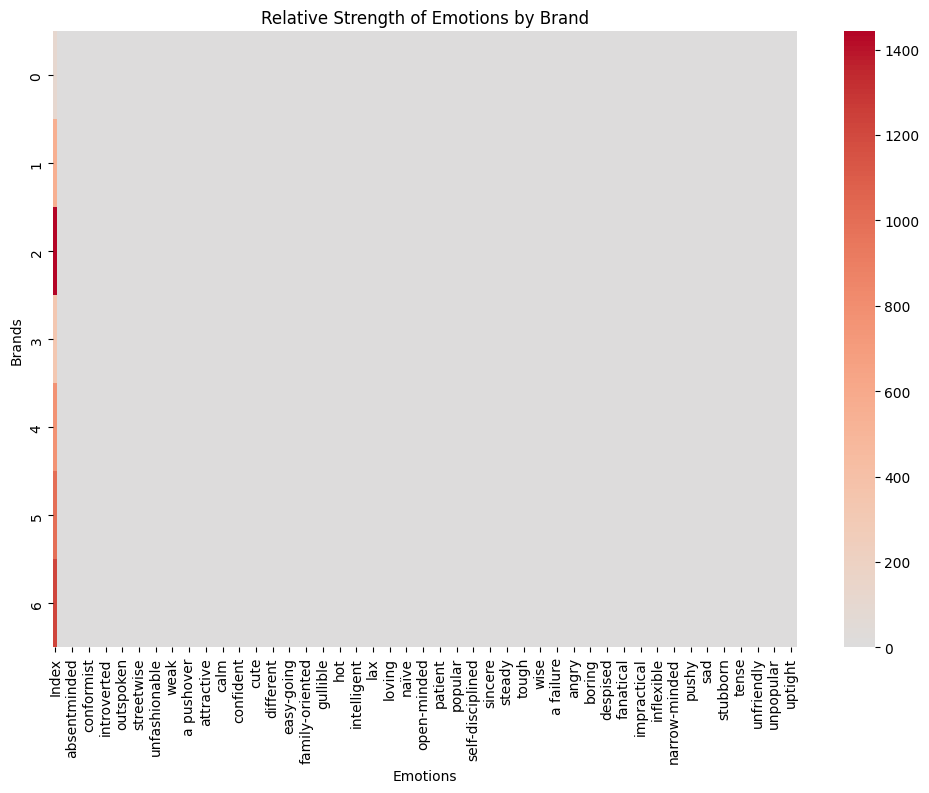

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
file_path = "Database_test_ds.xlsx"
df = pd.read_excel(file_path)

# Step 2: Identify emotion columns
non_emotion_columns = ["Brand", "Consideration"]  # Non-emotion columns
emotion_columns = [col for col in df.columns if col not in non_emotion_columns]

# Select emotion data
emotion_data = df[emotion_columns]

# Clean emotion data
emotion_data = emotion_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
emotion_data = emotion_data.dropna(axis=0, how='all')  # Drop rows with all NaN
emotion_data = emotion_data.dropna(axis=1, how='all')  # Drop columns with all NaN

# Aggregate emotions by brand
brand_emotion_summary = emotion_data.groupby(df["Brand"]).mean()

# Debugging: Check aggregated data
print("Brand emotion summary:")
print(brand_emotion_summary.head())

# Check for missing values
print("Missing values in brand_emotion_summary:")
print(brand_emotion_summary.isnull().sum())

# Drop rows and columns with all NaN values
brand_emotion_summary = brand_emotion_summary.dropna(axis=0, how='all')
brand_emotion_summary = brand_emotion_summary.dropna(axis=1, how='all')

# Impute remaining missing values (if any)
imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
brand_emotion_summary = pd.DataFrame(imputer.fit_transform(brand_emotion_summary), columns=brand_emotion_summary.columns)

# Verify cleaned data
print("Cleaned brand emotion summary:")
print(brand_emotion_summary.head())

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    brand_emotion_summary,
    cmap="coolwarm",  # Improved color scheme
    annot=False,      # Set to True if you want annotations
    center=0          # Center the color scale at 0 for diverging colors
)
plt.title("Relative Strength of Emotions by Brand")
plt.xlabel("Emotions")
plt.ylabel("Brands")
plt.show()